### 비지도학습 (Unsupervised Learning)
- 지도학습과는 다르게 결과값(y값, 목표값...)이 없는 경우  


* 차원축소 : PCA, LDA...
* 군집화(Clustering) : K-Means Clustering, DBSCAN
* 군집화 평가 : 실루엣

### 차원축소
* feature의 개수를 줄임
* 특징을 추출하는 역할
* 계산량이 감소하는 효과

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
iris = datasets.load_iris()
data = iris['data']

In [24]:
df = pd.DataFrame(data=data, columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### PCA (주성분분석)
* 선형 차원 축소 기법
* 분산을 취대한 보존
* n_components 파라미터
  * 1보다 작은 값 : 분산을 기준으로 축소
  * 1보다 큰 값 : 해당값의 개수로 feature 축소

In [25]:
pca = PCA(n_components=2)
data2 = StandardScaler().fit_transform(df.drop('target', axis=1))
pca_data = pca.fit_transform(data2)
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

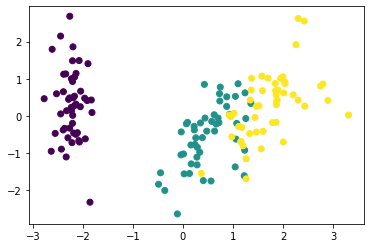

In [28]:
import matplotlib.pyplot as plt
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

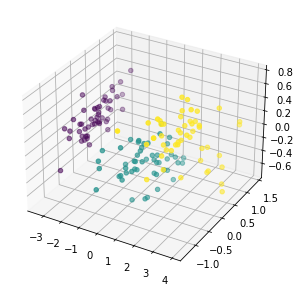

In [39]:
# 1보다 작으면 분산을 기준으로 축소
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(df)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c=df['target'])

### LDA (Linear Discriminant Analysis)
- 선형 판별 분석(PCA와 유사)
- 분류값을 최대화하는 축을 찾기 위해 분류간의 내부 분산의 비율을 최대화하는 방식

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(df, df['target'])

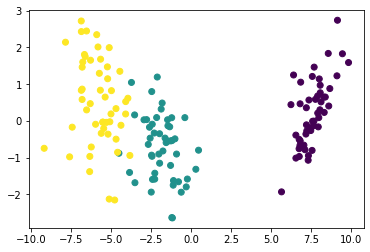

In [42]:
plt.scatter(lda_data[:,0], lda_data[:,1], c=df['target'])

### SVD (Singular Value Decomposition)
* 특이값 분해기법 사용
* 추천시스템에도 많이 사용

In [45]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(df.iloc[:, :4])

In [46]:
svd_data[:5]

array([[5.91274714, 2.30203322],
       [5.57248242, 1.97182599],
       [5.44697714, 2.09520636],
       [5.43645948, 1.87038151],
       [5.87564494, 2.32829018]])

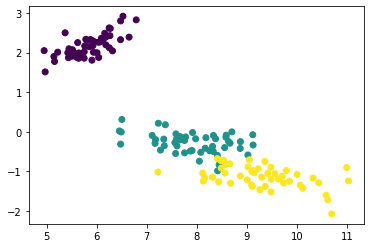

In [47]:
plt.scatter(svd_data[:, 0], svd_data[:,1], c=df['target'])

### 군집화
#### K-Means Clustering
- 대중적인 알고리즘
- 중심점을 기준으로 가장 가까운 점들을 선택하는 군집화 기법

In [63]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km_data = km.fit_transform(df.drop('target', axis=1))

In [64]:
km.labels_ # 어떻게 분류되어있는지 확인할 수 있음

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

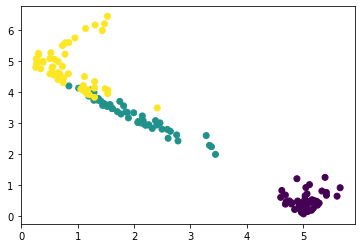

In [66]:
plt.scatter(km_data[:, 0], km_data[:,1], c=df['target'])

### DBSCAN (Density-Based Spatial Clustering of Application with Noise)
- 밀도기반 클러스터링
- 밀도가 높은 부분을 클러스터링하는 방식
- 미리 클러스터 개수를 지정할 필요 없음
- 어느 지점을 기준으로 특정 반경 내의 n개 이상 있으면 하나의 군집
- 기하학적인 데이터에서도 분류가 잘됨

In [68]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
db_data = db.fit_predict(df.iloc[:, :4])
db_data # -1 값은 이상치를 뜻함

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [113]:
# 기하학적인 데이터 만들어보기
from sklearn.datasets import make_circles, make_moons
x1, y1 = make_circles(n_samples=1000, factor=.5, noise=.03)
x2, y2 = make_moons(n_samples=1000, noise=.1)

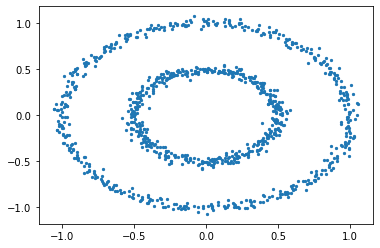

In [114]:
plt.scatter(x1[:,0], x1[:,1], s=5)

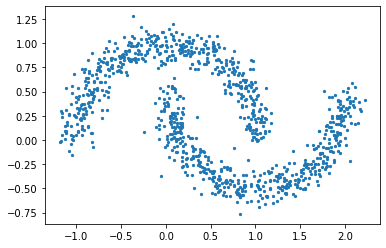

In [115]:
plt.scatter(x2[:,0], x2[:,1], s=5)

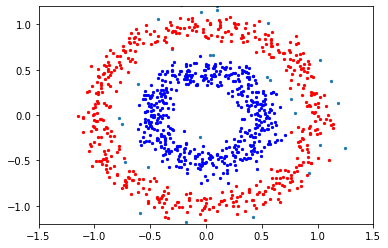

In [150]:
import numpy as np
np.random.seed(2)
x1, y1 = make_circles(n_samples=1000, factor=.5, noise=.09)
db = DBSCAN(0.1)
y1_ = db.fit_predict(x1)
plt.scatter(x1[db.labels_==-1, 0], x1[db.labels_==-1, 1], s=5)
plt.scatter(x1[db.labels_==0, 0], x1[db.labels_==0, 1], s=5, c='r')
plt.scatter(x1[db.labels_==1, 0], x1[db.labels_==1, 1], s=5, c='b')
plt.ylim((-1.2, 1.2))
plt.xlim((-1.5, 1.5))
plt.show()

In [151]:
db.labels_

array([ 0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  0,  0,  0,  0,  0,  1,  0,  1, -1,  0,  0,  1,  1,  0,  0,  1,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,
        1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,
        0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  1,
        0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,
        1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  0,  1,  0

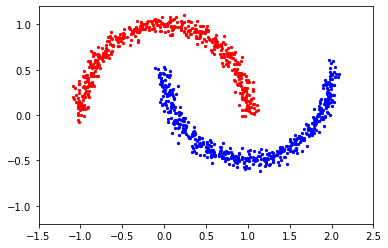

In [160]:
x1, y1 = make_moons(n_samples=1000, noise=.05)
db = DBSCAN(0.1)
y1_ = db.fit_predict(x1)
plt.scatter(x1[db.labels_==-1, 0], x1[db.labels_==-1, 1], s=5)
plt.scatter(x1[db.labels_==0, 0], x1[db.labels_==0, 1], s=5, c='r')
plt.scatter(x1[db.labels_==1, 0], x1[db.labels_==1, 1], s=5, c='b')
plt.ylim((-1.2, 1.2))
plt.xlim((-1.5, 2.5))
plt.show()

### 실루엣
- 군집화 평가
- 1에 가까워지면 클러스터링이 잘 됨
- 0에 가까워지면 클러스터링이 잘 안됐다
- 음수면 잘못됨

In [162]:
from sklearn.metrics import silhouette_score
silhouette_score(km_data, km.labels_) # k-means 실루엣계수 확인

0.6557746989993256

In [192]:
db = DBSCAN()
# db = DBSCAN(0.8)
target = db.fit_predict(df.drop('target', axis=1))
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [193]:
silhouette_score(df.drop('target', axis=1), target)

0.48603419703456857

In [ ]:
# 실루엣계수로 K-Means의 seed값 결정하는법 참고 사이트
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [196]:
def s_eval(X, range_n_clusters):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7553195583748171
For n_clusters = 3 The average silhouette_score is : 0.6547775183610827
For n_clusters = 4 The average silhouette_score is : 0.6254369514784812
For n_clusters = 5 The average silhouette_score is : 0.642685340451886


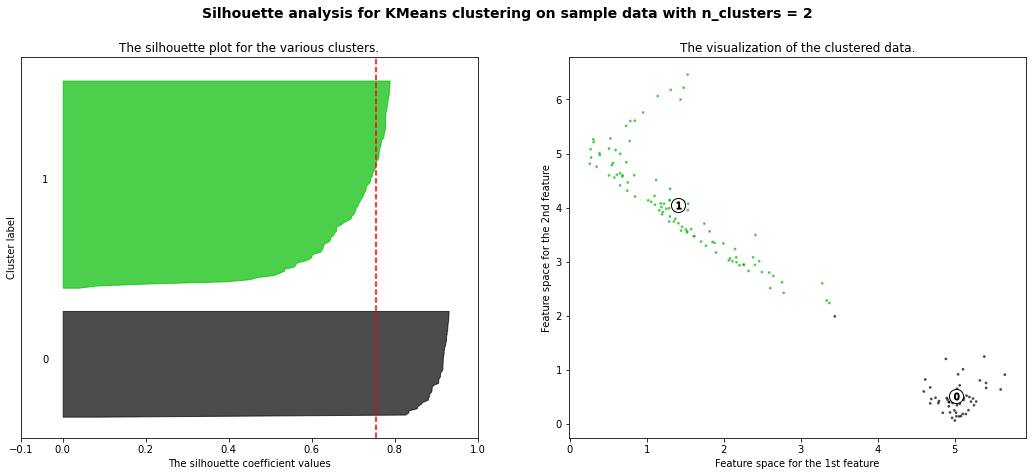

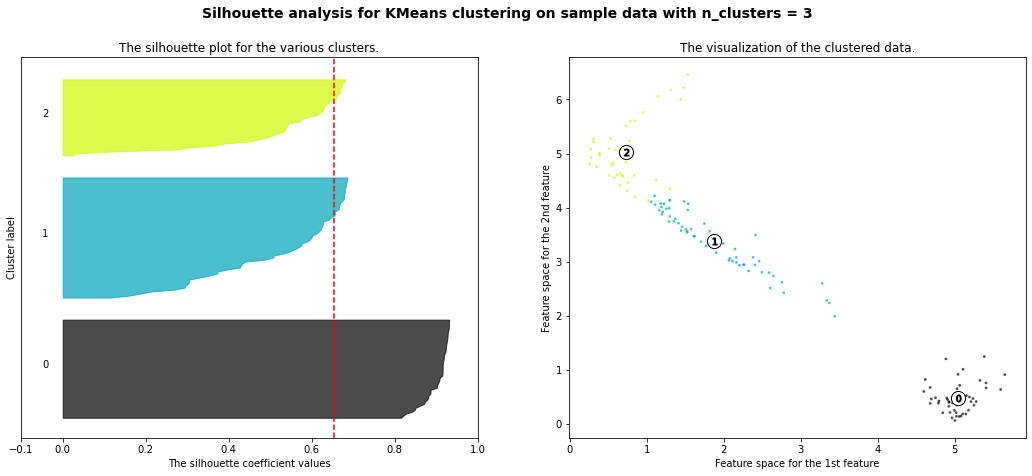

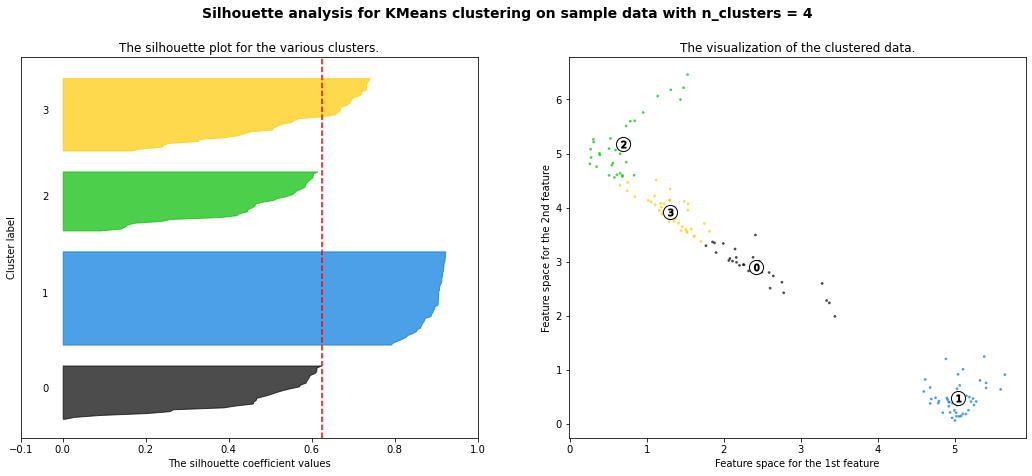

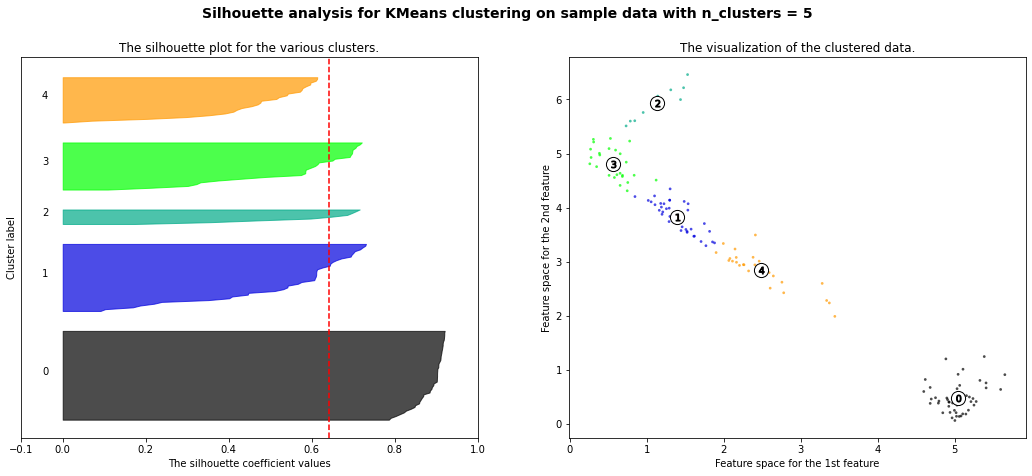

In [197]:
s_eval(km_data, [2,3,4,5])